# Data Sources and EDA
https://gallery.azure.ai/Notebook/Predictive-Maintenance-Modelling-Guide-Python-Notebook-1
Updates :
1. remove all the 'repeated' model results

In [64]:
import pandas as pd

telemetry = pd.read_csv('telemetry.csv')
errors = pd.read_csv('errors.csv')
maint = pd.read_csv('maint.csv')
failures = pd.read_csv('failures.csv')
machines = pd.read_csv('machines.csv')


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Telemetry

In [66]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,1/1/2015 6:00:00 AM,1,176.217853,418.504078,113.077935,45.087686
1,1/1/2015 7:00:00 AM,1,162.879223,402.747490,95.460525,43.413973
2,1/1/2015 8:00:00 AM,1,170.989902,527.349825,75.237905,34.178847
3,1/1/2015 9:00:00 AM,1,162.462833,346.149335,109.248561,41.122144
4,1/1/2015 10:00:00 AM,1,157.610021,435.376873,111.886648,25.990511


In [67]:
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
876095,1/1/2016 2:00:00 AM,100,179.438162,395.222827,102.290715,50.771941
876096,1/1/2016 3:00:00 AM,100,189.617555,446.207972,98.180607,35.123072
876097,1/1/2016 4:00:00 AM,100,192.483414,447.816524,94.132837,48.314561
876098,1/1/2016 5:00:00 AM,100,165.475310,413.771670,104.081073,44.835259
876099,1/1/2016 6:00:00 AM,100,171.336037,496.096870,79.095538,37.845245


In [68]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%m/%d/%Y %H:%M:%S %p")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


In [69]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


Text(0.5,0,'Date')

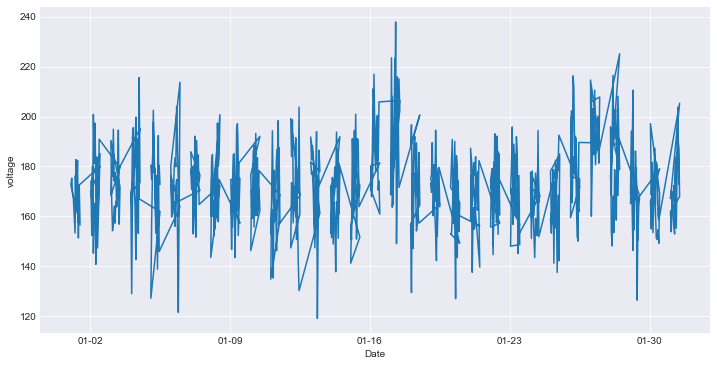

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [71]:
# Errors file EDA

In [72]:
errors.head()

,datetime,machineID,errorID
0,1/3/2015 7:00:00 AM,1,error1
1,1/3/2015 8:00:00 PM,1,error3
2,1/4/2015 6:00:00 AM,1,error5
3,1/10/2015 3:00:00 PM,1,error4
4,1/22/2015 10:00:00 AM,1,error4


In [73]:
# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%m/%d/%Y %H:%M:%S %p")
errors['errorID'] = errors['errorID'].astype('category')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 08:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 03:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


Text(0,0.5,'Count')

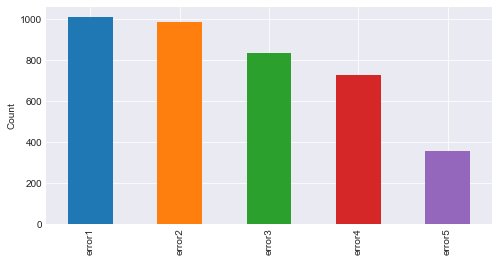

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [75]:
# Maintenance file EDA

In [76]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%m/%d/%Y %H:%M:%S %p")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Text(0,0.5,'Count')

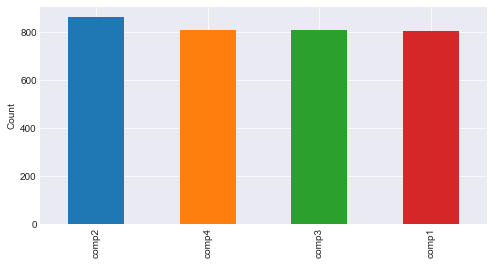

In [77]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [78]:
# Machines

In [79]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


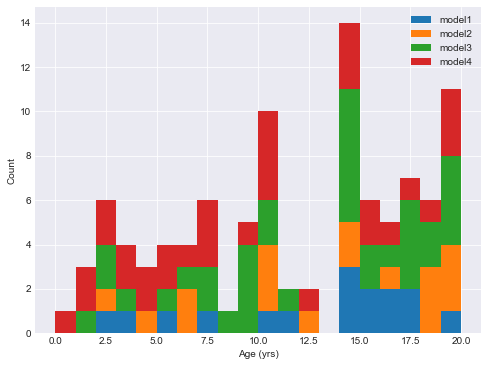

In [80]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [81]:
# Failures

In [82]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%m/%d/%Y %H:%M:%S %p")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Text(0,0.5,'Count')

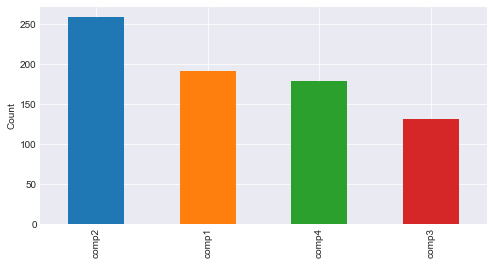

In [83]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

# Feature Engineering

Lag Features from Telemetry

Telemetry data almost always comes with time-stamps which makes it suitable for calculating lagging features. A common method is to pick a window size for the lag features to be created and compute rolling aggregate measures such as mean, standard deviation, minimum, maximum, etc. to represent the short term history of the telemetry over the lag window. In the following, rolling mean and standard deviation of the telemetry data over the last 3 hour lag window is calculated for every 3 hours.


In [84]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 03:00:00,173.923652,404.136749,105.812722,40.482148
1,1,2015-01-01 06:00:00,165.514453,430.472823,101.703289,40.373739
2,1,2015-01-01 09:00:00,169.419170,443.322459,92.751591,41.316022
3,1,2015-01-01 12:00:00,166.485980,445.096261,98.066944,38.026274
4,1,2015-01-01 15:00:00,156.556031,499.071623,111.755684,42.753920


In [85]:
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 03:00:00,1.981132,7.761159,6.804685,7.071265
1,1,2015-01-01 06:00:00,4.673269,42.047278,4.554047,2.106108
2,1,2015-01-01 09:00:00,4.153774,28.912058,7.797955,3.931113
3,1,2015-01-01 12:00:00,10.403711,23.922036,4.744360,6.967834
4,1,2015-01-01 15:00:00,NaN,NaN,NaN,NaN


In [86]:
# For capturing a longer term effect, 24 hour lag features are also calculated as below.

In [87]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                        index='datetime',
                                        columns='machineID',
                                        values=col).rolling(window=24).mean().resample('3H',
                                                                        closed='left',
                                                                        label='right',
                                                                        how='first').unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                        index='datetime',
                                        columns='machineID',
                                        values=col).rolling(window=24).std().resample('3H',
                                                                                closed='left',
                                                                                label='right',
                                                                                how='first').unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
12,1,2015-01-02 15:00:00,168.592135,442.750489,99.266746,39.755253
16,1,2015-01-03 03:00:00,168.878800,444.799184,99.851093,40.175893
17,1,2015-01-03 06:00:00,168.572333,450.431955,98.582867,40.504804
18,1,2015-01-03 09:00:00,169.423275,452.632330,98.350501,40.960486
19,1,2015-01-03 12:00:00,168.928978,457.629964,98.789446,41.947954
20,1,2015-01-03 15:00:00,170.829001,453.018704,98.226421,43.672868
24,1,2015-01-04 03:00:00,170.726368,453.371585,98.860508,44.115893
25,1,2015-01-04 06:00:00,170.662208,455.082431,99.777113,45.167669
26,1,2015-01-04 09:00:00,171.104814,451.640819,98.606227,46.688265
27,1,2015-01-04 12:00:00,172.702079,453.274707,99.398094,48.469149


In [88]:
# Next, the columns of the feature datasets created earlier are merged to create the final feature set from telemetry.

In [89]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.ix[:, 2:6],
                            telemetry_mean_24h.ix[:, 2:6],
                            telemetry_sd_24h.ix[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()
# good warning for iloc

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000,145400.000000
mean,50.500000,170.785711,446.626744,100.860459,40.385285,9.183832,30.668529,6.124017,3.064099,170.770534,446.616236,100.853580,40.384149,10.663429,35.873937,7.292423,3.609956
std,28.866169,7.457728,26.505069,6.139711,2.824049,5.356764,17.862435,3.571274,1.782557,3.792570,14.775439,3.959982,1.706084,1.695502,6.121902,1.579325,0.681332
min,1.000000,139.647463,245.404743,78.433167,28.586484,0.000107,0.001535,0.000400,0.000253,160.455637,286.313926,93.820178,36.776128,4.268238,15.800835,3.188277,1.588193
25%,25.750000,165.931461,432.943274,97.242583,38.641483,5.141478,17.225082,3.431794,1.726302,168.679751,443.556537,99.091634,39.563737,9.503000,31.750717,6.338445,3.176497
50%,50.500000,170.383750,448.544386,100.221882,40.134773,8.527671,28.428910,5.672553,2.840632,170.216280,449.153078,100.113719,40.074836,10.575746,35.380554,7.065160,3.534139
75%,75.250000,175.023603,463.568536,103.350260,41.699419,12.451076,41.640833,8.314143,4.146942,171.851277,454.312966,101.215471,40.631501,11.705215,39.326014,7.879059,3.932498
max,100.000000,227.861199,548.575695,158.539111,65.014619,49.127233,153.720232,29.789736,16.240769,213.195418,483.909470,147.746285,58.696711,24.752156,98.866544,25.890366,10.306187


In [90]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
16,1,2015-01-03 03:00:00,175.748152,481.711850,105.500684,48.346931,5.168370,32.411592,13.469990,3.916732,168.878800,444.799184,99.851093,40.175893,8.679709,26.739817,9.585610,4.153723
17,1,2015-01-03 06:00:00,170.061821,463.341700,96.136646,42.736512,5.484934,25.029129,6.297534,4.992816,168.572333,450.431955,98.582867,40.504804,8.631339,28.684442,9.475771,4.613958
18,1,2015-01-03 09:00:00,167.385444,479.640819,95.587751,52.113603,3.295000,57.135593,0.624629,1.222077,169.423275,452.632330,98.350501,40.960486,8.512075,25.113551,9.445046,5.214756
19,1,2015-01-03 12:00:00,174.273525,415.590391,96.961263,48.965164,9.606959,24.297012,5.150089,4.750241,168.928978,457.629964,98.789446,41.947954,8.517524,30.096590,8.983091,6.062866
24,1,2015-01-04 03:00:00,158.168706,469.082669,108.745815,52.822707,15.650609,11.610212,6.129080,0.920663,170.726368,453.371585,98.860508,44.115893,8.140918,31.835329,8.418557,6.416231


In [91]:
# Lag Features from Errors

In [92]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 08:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 03:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 03:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 10:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 06:00:00,1,0,0,0,0


In [93]:
# Now we add blank entries for all other hourly timepoints (since no errors occurred at those times):

In [94]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)

In [95]:
error_count.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


In [96]:
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.002305,0.002253,0.001911,0.001660,0.000813
std,28.866087,0.047998,0.047414,0.043670,0.040705,0.028496
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# Finally, we can compute the total number of errors of each type over the last 24 hours,
# for timepoints taken every three hours:

In [98]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                        index='datetime',
                                        columns='machineID',
                                        values=col).rolling(window=24).sum().resample('3H',
                                                                             closed='left',
                                                                             label='right',
                                                                             how='first').unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,182000.000000,182000.000000,182000.000000,182000.000000,182000.000000,182000.000000
mean,50.500000,0.055264,0.054165,0.045863,0.039868,0.019522
std,28.866149,0.235015,0.232687,0.213426,0.199818,0.139655
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2.000000,3.000000,2.000000,3.000000,2.000000


In [99]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
12,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
16,1,2015-01-03 03:00:00,0.0,0.0,0.0,0.0,0.0
17,1,2015-01-03 06:00:00,0.0,0.0,0.0,0.0,0.0
18,1,2015-01-03 09:00:00,0.0,0.0,0.0,0.0,0.0
19,1,2015-01-03 12:00:00,1.0,0.0,1.0,0.0,0.0


In [100]:
# Days Since Last Replacement from Maintenance

A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected.

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data.

In [101]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

In [102]:
# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

In [103]:
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

In [104]:
# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

In [105]:
# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - pd.to_datetime(comp_rep[comp]) )/ np.timedelta64(1, 'D')
    
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.513424,51.531980,52.717440,53.825623
std,28.866087,62.511495,59.295731,58.897859,59.730823
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.125000,12.041667,13.041667,13.000000
50%,50.500000,32.875000,29.833333,32.125000,32.250000
75%,75.250000,68.875000,66.791667,67.166667,70.250000
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [106]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
13,2015-01-01 01:00:00,1,18.791667,213.791667,153.791667,168.791667
14,2015-01-01 02:00:00,1,18.833333,213.833333,153.833333,168.833333
15,2015-01-01 03:00:00,1,18.875000,213.875000,153.875000,168.875000
16,2015-01-01 04:00:00,1,18.916667,213.916667,153.916667,168.916667
17,2015-01-01 05:00:00,1,18.958333,213.958333,153.958333,168.958333


In [107]:
# Machine Features

The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.

In [108]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())

   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-03 03:00:00   175.748152     481.711850       105.500684   
1          1 2015-01-03 03:00:00   175.748152     481.711850       105.500684   
2          1 2015-01-03 06:00:00   170.061821     463.341700        96.136646   
3          1 2015-01-03 06:00:00   170.061821     463.341700        96.136646   
4          1 2015-01-03 09:00:00   167.385444     479.640819        95.587751   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         48.346931   5.168370    32.411592      13.469990        3.916732   
1         48.346931   5.168370    32.411592      13.469990        3.916732   
2         42.736512   5.484934    25.029129       6.297534        4.992816   
3         42.736512   5.484934    25.029129       6.297534        4.992816   
4         52.113603   3.295000    57.135593       0.624629        1.222077   

  ...   error2count  error3count  error4coun

In [109]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,290600.00000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,...,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000,290600.000000
mean,50.50000,170.784241,446.627747,100.859695,40.384987,9.181145,30.659408,6.122426,3.063550,170.769990,...,0.055327,0.054233,0.045843,0.039883,0.019553,53.142056,51.062731,52.269661,53.366516,11.330000
std,28.86612,7.453563,26.498299,6.135179,2.823322,5.352871,17.851945,3.568981,1.781664,3.792127,...,0.235059,0.232771,0.213283,0.199757,0.139793,62.373117,59.050297,58.694054,59.536192,5.827625
min,1.00000,139.647463,245.404743,78.433167,28.586484,0.000107,0.001535,0.000400,0.000253,160.455637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,165.932293,432.948793,97.243098,38.641607,5.141002,17.223384,3.431191,1.726333,168.679655,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.125000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.383281,448.546387,100.221741,40.134741,8.526669,28.423411,5.671817,2.840363,170.216205,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.250000,29.250000,32.000000,32.125000,12.000000
75%,75.25000,175.021681,463.566287,103.349521,41.699168,12.448116,41.629599,8.311798,4.145974,171.851011,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.125000,66.000000,66.875000,69.875000,16.000000
max,100.00000,227.861199,548.575695,158.539111,65.014619,49.127233,153.720232,29.789736,16.240769,213.195418,...,2.000000,3.000000,2.000000,3.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


# Label Construction
When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records as "Â€Âœnormal." This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

The prediction problem for this example scenerio is to estimate the probability that a machine will fail in the near future due to a failure of a certain component. More specifically, the goal is to compute the probability that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4). Below, a categorical failure feature is created to serve as the label. All records within a 24 hour window before a failure of component 1 have failure=comp1, and so on for components 2, 3, and 4; all records not within 24 hours of a component failure have failure=none.

In [110]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features["failure"]=labeled_features["failure"].astype(object).fillna(method = 'bfill', limit = 7)

labeled_features["failure"] = labeled_features["failure"].fillna('none')

labeled_features["failure"]=labeled_features["failure"].astype('category')
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-03 03:00:00,175.748152,481.711850,105.500684,48.346931,5.168370,32.411592,13.469990,3.916732,...,0.0,0.0,0.0,20.875,215.875,155.875,170.875,model3,18,none
1,1,2015-01-03 03:00:00,175.748152,481.711850,105.500684,48.346931,5.168370,32.411592,13.469990,3.916732,...,0.0,0.0,0.0,20.875,215.875,155.875,170.875,model3,18,none
2,1,2015-01-03 06:00:00,170.061821,463.341700,96.136646,42.736512,5.484934,25.029129,6.297534,4.992816,...,0.0,0.0,0.0,21.000,216.000,156.000,171.000,model3,18,none
3,1,2015-01-03 06:00:00,170.061821,463.341700,96.136646,42.736512,5.484934,25.029129,6.297534,4.992816,...,0.0,0.0,0.0,21.000,216.000,156.000,171.000,model3,18,none
4,1,2015-01-03 09:00:00,167.385444,479.640819,95.587751,52.113603,3.295000,57.135593,0.624629,1.222077,...,0.0,0.0,0.0,21.125,216.125,156.125,171.125,model3,18,none


Below is an example of records that are labeled as failure=comp4 in the failure column. Notice that the first 8 records all occur in the 24-hour window before the first recorded failure of component 4. The next 8 records are within the 24 hour window before another failure of component 4.

In [111]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
11,1,2015-01-04 06:00:00,181.271723,448.837161,96.255457,51.473455,8.380937,64.408125,2.880386,1.065766,...,1.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,comp4
12,1,2015-01-04 09:00:00,178.303831,438.240195,106.790408,50.771468,9.696314,13.413897,5.561002,2.232865,...,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
13,1,2015-01-04 09:00:00,178.303831,438.240195,106.790408,50.771468,9.696314,13.413897,5.561002,2.232865,...,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
14,1,2015-01-04 12:00:00,172.698619,452.189999,96.190862,54.566777,16.513833,11.036243,7.133105,2.545897,...,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
15,1,2015-01-04 12:00:00,172.698619,452.189999,96.190862,54.566777,16.513833,11.036243,7.133105,2.545897,...,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
16,1,2015-01-05 03:00:00,160.126284,421.409480,102.344901,44.364808,8.893950,11.819227,1.207749,1.874927,...,1.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
17,1,2015-01-05 03:00:00,160.126284,421.409480,102.344901,44.364808,8.893950,11.819227,1.207749,1.874927,...,1.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
18,1,2015-01-05 06:00:00,187.179577,463.434015,94.190478,44.064567,11.254429,51.127670,7.948655,4.325338,...,1.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
19,1,2015-01-05 06:00:00,187.179577,463.434015,94.190478,44.064567,11.254429,51.127670,7.948655,4.325338,...,1.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1331,1,2015-06-18 06:00:00,175.574175,457.932391,109.424754,51.920057,4.572921,26.986874,7.243131,3.103565,...,0.0,0.0,0.0,89.000,29.000,14.000,134.000,model3,18,comp4


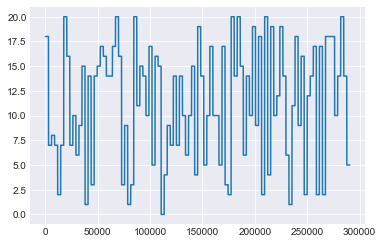

In [112]:
plt.plot(labeled_features['age'])
plt.show()

Text(0,0.5,'Count')

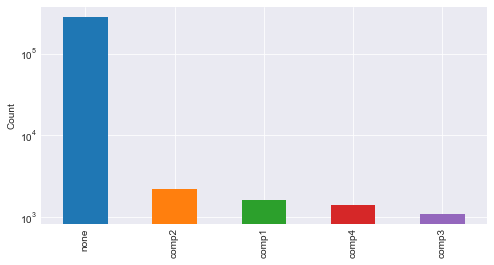

In [113]:
# to show how often it happens for each components (log scale on count Y)
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
labeled_features['failure'].value_counts().plot(kind='bar')
plt.yscale('log', basey=10)
plt.ylabel('Count')

# Modeling

#Training, Validation and Testing
For both of these reasons, a time-dependent record splitting strategy is an excellent choice for predictive maintenace models. The split is effected by choosing a point in time based on the desired size of the training and test sets: all records before the timepoint are used for training the model, and all remaining records are used for testing. (If desired, the timeline could be further divided to create validation sets for parameter selection.) To prevent any records in the training set from sharing time windows with the records in the test set, we remove any records at the boundary -- in this case, by ignoring 24 hours' worth of data prior to the timepoint.

In [114]:
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# make test and training splits
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')]]
                  # [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                  # [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data
    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                       'machineID',
                                                                                                       'failure'], 1))
    # train and predict using the model, storing results for later
    #my_model = GradientBoostingClassifier(random_state=42)
    my_model=LogisticRegression()
    my_model.fit(train_X, train_y)
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result['predicted_failure'] = my_model.predict(test_X)
    test_results.append(test_result)
    models.append(my_model)

In [117]:
train_y.shape

(167244,)

In [118]:
train_X.shape

(167244, 30)

In [119]:
train_X.head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,175.748152,481.711850,105.500684,48.346931,5.168370,32.411592,13.469990,3.916732,168.878800,444.799184,...,0.0,20.875,215.875,155.875,170.875,18,0,0,1,0
1,175.748152,481.711850,105.500684,48.346931,5.168370,32.411592,13.469990,3.916732,168.878800,444.799184,...,0.0,20.875,215.875,155.875,170.875,18,0,0,1,0
2,170.061821,463.341700,96.136646,42.736512,5.484934,25.029129,6.297534,4.992816,168.572333,450.431955,...,0.0,21.000,216.000,156.000,171.000,18,0,0,1,0
3,170.061821,463.341700,96.136646,42.736512,5.484934,25.029129,6.297534,4.992816,168.572333,450.431955,...,0.0,21.000,216.000,156.000,171.000,18,0,0,1,0
4,167.385444,479.640819,95.587751,52.113603,3.295000,57.135593,0.624629,1.222077,169.423275,452.632330,...,0.0,21.125,216.125,156.125,171.125,18,0,0,1,0


In [ ]:
# Below, we plot the feature importances in the (first) trained model:

Also, due to the class imbalance problem, it is important to look at evaluation metrics other than accuracy alone and compare those metrics to the baseline metrics which are computed when random chance is used to make predictions rather than a machine learning model. The comparison will bring out the value and benefits of using a machine learning model better.

In the following, we use an evaluation function that computes many important evaluation metrics along with baseline metrics for classification problems. For a detailed explanation of the metrics, please refer to the scikit-learn documentation and a companion blog post (with examples in R, not Python), Computing Classification Evaluation Metrics in R .


In [61]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])
    
    
    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

In [62]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[119652    110    217     30     40]
 [   420    142     16      8      8]
 [   315      2    655      0     10]
 [   283      2      4    144      0]
 [   308      2     12      2    256]]


,none,comp1,comp2,comp3,comp4
accuracy,0.985412,0.985412,0.985412,0.985412,0.985412
precision,0.989039,0.550388,0.724558,0.782609,0.815287
recall,0.996693,0.239057,0.667006,0.332564,0.441379
F1,0.992851,0.333333,0.694592,0.466775,0.572707


In predictive maintenance, we are often most concerned with how many of the actual failures were predicted by the model, i.e. the model's recall. (Recall becomes more important as the consequences of false negatives -- true failures that the model did not predict -- exceed the consequences of false positives, viz. false prediction of impending failure.) Below, we compare the recall rates for each failure type for the three models. The recall rates for all components as well as no failure are all above 90% meaning the model was able to capture above 90% of the failures correctly.


# Summary

In this notebook, the steps of implementing a predictive maintenance model is provided using an example scenario where the goal is to predict failures due to certain components of a machine. Typical steps of predictive maintenance such as feature engineering, labelling, training and evaluation are explained using the example data sets. Predictive models are built both using Python packages and Azure Machine Learning Studio.

https://gallery.azure.ai/Notebook/Predictive-Maintenance-Modelling-Guide-Python-Notebook-1